# Impact of Inflation

### Introduction:
The exchange rate between two currencies plays a critical role in international trade, investment, and economic stability. In this project, we focus on the relationship between the Indian Rupee (INR) and the United States Dollar (USD) from 1980 to 2024. Specifically, the analysis aims to examine how inflation rates in India and the United States influence the INR/USD exchange rate over time.

Inflation is a key economic indicator that measures the rate at which the general price level of goods and services increases, reducing the purchasing power of money. According to the Purchasing Power Parity (PPP) theory, exchange rates should adjust to reflect inflation differentials between countries. In theory, higher inflation in one country should lead to the depreciation of its currency relative to another country with lower inflation. This project seeks to explore the extent to which PPP holds true for the INR/USD exchange rate and to identify other factors that may influence exchange rate fluctuations.

#### The primary objective of this analysis is twofold:

1. To identify any correlations between inflation rates and the INR/USD exchange rate, taking into account potential lag effects.
2. To test the validity of the PPP theory by comparing actual exchange rates with expected exchange rates based on inflation differentials between India and the US.
3. Beyond this, we explore deviations from the PPP-based exchange rate to uncover other macroeconomic factors that might contribute to currency fluctuations, such as interest rates, trade balances, and foreign reserves.

By the end of this project, we aim to provide a comprehensive understanding of how inflation dynamics shape the INR/USD exchange rate and what factors drive any deviations from theoretical predictions.

In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import grangercausalitytests
import statsmodels.api as sm

In [33]:
exchange_rate_data=pd.read_csv('USD_INR_Exchange_Rates_1980_2024.csv')
inflation_data=pd.read_csv('Inflation_Rates_Transformed-1.csv')

In [34]:
inflation_data.head()

,Country,Year,Inflation Rate
0,India,1980,11.3
1,United States,1980,13.5
2,Emerging market and developing economies,1980,26.0
3,India,1981,12.7
4,United States,1981,10.4


In [35]:
exchange_rate_data.head()

,Year,Average Exchange Rate (INR/USD)
0,2003,45.476087
1,2004,45.188604
2,2005,44.003753
3,2006,45.183561
4,2007,41.192248


### Data Preprocessing

In [36]:
inflation_filtered_df = inflation_data[inflation_data['Country'].isin(['India', 'United States'])]
inflation_pivot_df = inflation_filtered_df.pivot(index='Year', columns='Country', values='Inflation Rate').reset_index()
Final_data = pd.merge(exchange_rate_data, inflation_pivot_df, on='Year')
Final_data.columns = ['Year', 'Exchange Rate (INR/USD)', 'Inflation Rate (India)', 'Inflation Rate (United States)']
Final_data.head()

,Year,Exchange Rate (INR/USD),Inflation Rate (India),Inflation Rate (United States)
0,2003,45.476087,4.1,2.3
1,2004,45.188604,4.0,2.7
2,2005,44.003753,3.7,3.4
3,2006,45.183561,6.7,3.2
4,2007,41.192248,5.9,2.9


In [37]:
Final_data['Inflation_Differential']=Final_data['Inflation Rate (India)'] - Final_data['Inflation Rate (United States)']

In [38]:
Final_data.head()

,Year,Exchange Rate (INR/USD),Inflation Rate (India),Inflation Rate (United States),Inflation_Differential
0,2003,45.476087,4.1,2.3,1.8
1,2004,45.188604,4.0,2.7,1.3
2,2005,44.003753,3.7,3.4,0.3
3,2006,45.183561,6.7,3.2,3.5
4,2007,41.192248,5.9,2.9,3.0


In [39]:
Final_data.columns

Index(['Year', 'Exchange Rate (INR/USD)', 'Inflation Rate (India)',
       'Inflation Rate (United States)', 'Inflation_Differential'],
      dtype='object')

### Correlation Between Exchange rates and Inflation rates

In [45]:
corr_matrix_inflation = Final_data[['Exchange Rate (INR/USD)', 'Inflation Rate (India)','Inflation Rate (United States)']].corr()
print("Correlation Matrix (Exchange Rate vs Inflation Rates):")
corr_matrix_inflation

Correlation Matrix (Exchange Rate vs Inflation Rates):


,Exchange Rate (INR/USD),Inflation Rate (India),Inflation Rate (United States)
Exchange Rate (INR/USD),1.000000,-0.337748,0.235321
Inflation Rate (India),-0.337748,1.000000,-0.120503
Inflation Rate (United States),0.235321,-0.120503,1.000000


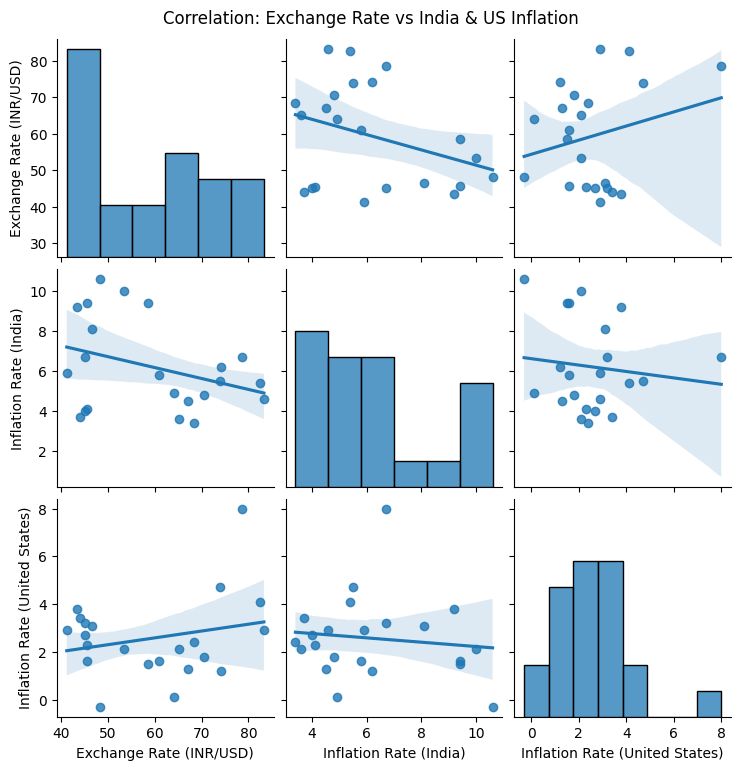

In [46]:
# Plot Seaborn pairplot for the first correlation
sns.pairplot(Final_data[['Exchange Rate (INR/USD)', 'Inflation Rate (India)','Inflation Rate (United States)']], kind='reg')
plt.suptitle('Correlation: Exchange Rate vs India & US Inflation', y=1.02)
plt.show()

#### Findings from the correlation analysis

1. Exchange rate vs Inflation Rate(India): The correlation coefficient is approximately -0.34, which indicates a weak negative relationship. So even though the inflation in India increases, the INR tends to deprecate against the USD, though the relationship is not very strong.
2. Exchange Rate vs Inflation Rate(USA: The correlation coefficient is approximately 0.24, which indicates a weak positive relationship. It suggests that the inflation rate in united states might be associated with a depciation of the USD against INR, but again, the relationship is not strong.

### Lagged Correlation Analysis

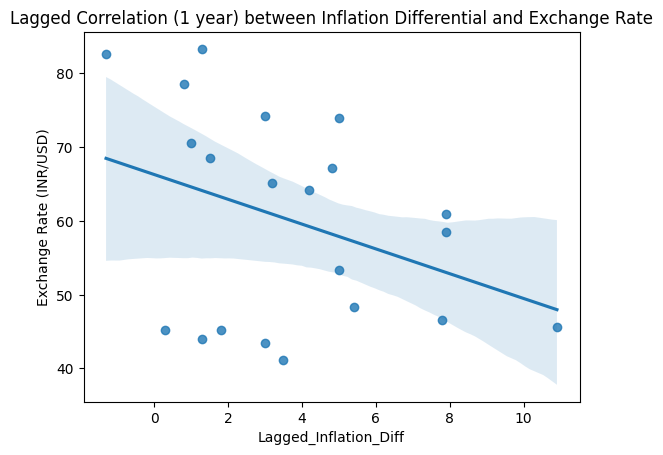

In [51]:
# Shift inflation differential by 1 year to check for lag effects
Final_data['Lagged_Inflation_Diff'] = Final_data['Inflation_Differential'].shift(1)

# Repeat the correlation analysis with the lagged data
sns.regplot(x=Final_data['Lagged_Inflation_Diff'], y=Final_data['Exchange Rate (INR/USD)'])
plt.title('Lagged Correlation (1 year) between Inflation Differential and Exchange Rate')
plt.show()

In [56]:
correlation = Final_data['Lagged_Inflation_Diff'].corr(Final_data['Exchange Rate (INR/USD)'])
print(f'Correlation: {correlation}')

Correlation: -0.3631233523942766


#### Interpreting the results

1. A negative correlation indicates that when the inflation differential increases, the exchange rate(INR/USD) tends to decrease, but this relationship is not very strong.
2. The lagged effect suggests that past inflation differentials may have some delayed impact on current exchange rates, but in this case, the effect is moderate.

### Comparative Analysis to highlight convergence/divergence between the inflation rates and the exchange rates

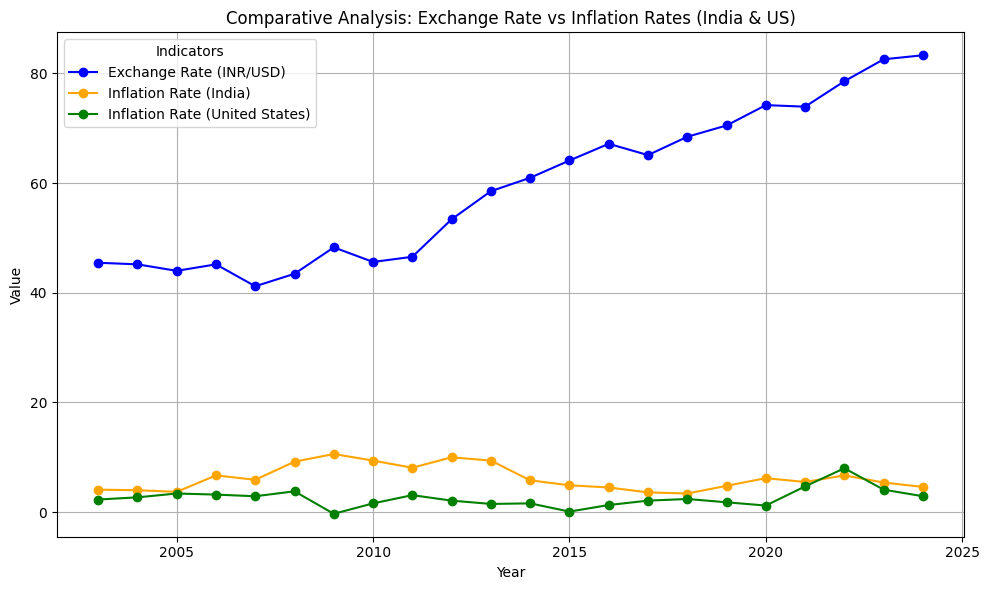

In [64]:
plt.figure(figsize=(10, 6))

plt.plot(Final_data['Year'], Final_data['Exchange Rate (INR/USD)'], 
         marker='o', linestyle='-', color='blue', label='Exchange Rate (INR/USD)')

plt.plot(Final_data['Year'], Final_data['Inflation Rate (India)'], 
         marker='o', linestyle='-', color='orange', label='Inflation Rate (India)')

plt.plot(Final_data['Year'], Final_data['Inflation Rate (United States)'], 
         marker='o', linestyle='-', color='green', label='Inflation Rate (United States)')

plt.title('Comparative Analysis: Exchange Rate vs Inflation Rates (India & US)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(title='Indicators')

plt.grid(True)
plt.tight_layout()

plt.show()

#### Finding Comparative Analysis

1. Early 2000s: A period of high inflation in India coincides with a period of relative stability in exchange rate. It suggests that factors other than inflation may have been driving the exchange rate during this time.
2. Late 2000s to early 2010s : The period shows some alignment between rising inflation in India and a weakening INR, which indicates that inflation could be contributing to exchange rate movements.
3. 2015 onwards: The exchange rate continues to rise, while both India's and the united State's inflation rates remain relatively low. This divergence suggests that the exchange rate is influenced by additional factors beyond inflation, such as economic growth, monetory policy, and international trade dynamics.

### Analyzing Inflation based on the Purchasing Power Parity

Purchasing Power Parity is an economic thoery that suggests that in the long term, exchange rates between two countries should adjust so that a basket of goods cost the same in both countries when priced in a common currency. PPP is used as a methods to compare the economic productivity and standards of living between different countries. 

Expected Exchange Rate = Initial Exchange Rate × ( 1 + Inflation Rate in India / 1 + Inflation Rate in the US)

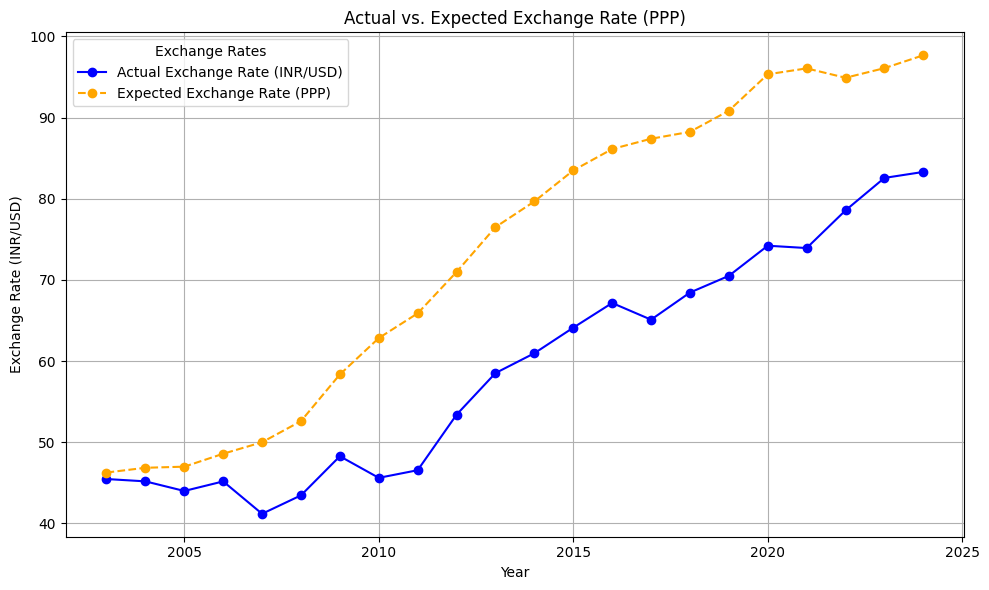

In [65]:
initial_exchange_rate = Final_data['Exchange Rate (INR/USD)'].iloc[0]

# Calculate the expected exchange rate based on PPP
Final_data['Expected Exchange Rate (PPP)'] = initial_exchange_rate * (
    (1 + Final_data['Inflation Rate (India)'] / 100) / (1 + Final_data['Inflation Rate (United States)'] / 100)
).cumprod()


plt.figure(figsize=(10, 6))

# Plot actual exchange rate (INR/USD)
plt.plot(Final_data['Year'], Final_data['Exchange Rate (INR/USD)'], 
         marker='o', linestyle='-', color='blue', label='Actual Exchange Rate (INR/USD)')

# Plot expected exchange rate (PPP)
plt.plot(Final_data['Year'], Final_data['Expected Exchange Rate (PPP)'], 
         marker='o', linestyle='--', color='orange', label='Expected Exchange Rate (PPP)')

# Add titles and labels
plt.title('Actual vs. Expected Exchange Rate (PPP)')
plt.xlabel('Year')
plt.ylabel('Exchange Rate (INR/USD)')
plt.legend(title='Exchange Rates')

# Customize grid and layout
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

The blue line represents the actual exchange rate (INR/USD) over time, while the orange dashed line represents the expected exchange rate based on PPP. In some periods, the actual exchange rate closely follows the expected PPP-based rate, which suggests that PPP holds. However, in other periods, there are significant deviations between the two.

The PPP-based expected exchange rate shows a more rapid increase compared to the actual exchange rate. It suggests that, according to PPP, the INR should have depreciated more than it actually did. However, the actual exchange rate was consistently lower than the PPP-based expected rate, which indicates that factors other than inflation are at play.

### Time-Series Forecasting with ARIMA/SARIMA

C:\Users\DC\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

C:\Users\DC\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

C:\Users\DC\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

C:\Users\DC\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autore

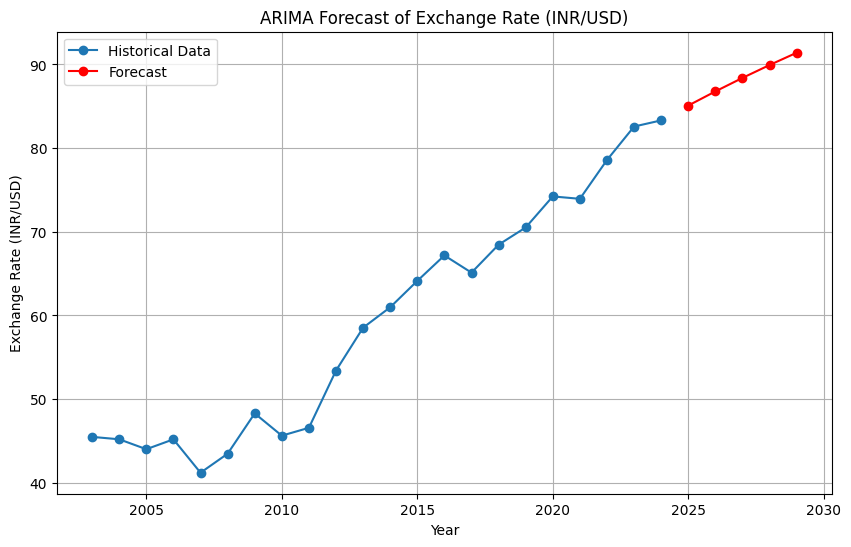

In [69]:
Final_data.set_index('Year',inplace=True)

# Fit ARIMA model
model = ARIMA(Final_data['Exchange Rate (INR/USD)'], order=(1, 1, 1))  # Adjust order as needed
model_fit = model.fit()

# Forecast future values
forecast = model_fit.forecast(steps=5)  # Forecasting for the next 5 periods

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(Final_data.index, Final_data['Exchange Rate (INR/USD)'], label='Historical Data', marker='o')
plt.plot(range(Final_data.index[-1]+1, Final_data.index[-1]+6), forecast, label='Forecast', marker='o', color='red')
plt.title('ARIMA Forecast of Exchange Rate (INR/USD)')
plt.xlabel('Year')
plt.ylabel('Exchange Rate (INR/USD)')
plt.legend()
plt.grid(True)
plt.show()

As we can see, the forecast shows that the forecast line is inclined at a 45 degrees. It shows that the exchange rate will increase with time and at a similar rate.

### Granger Casuality Test

In [71]:
max_lag = 2  # Maximum number of lags to consider
results = grangercausalitytests(Final_data[['Exchange Rate (INR/USD)', 'Inflation Rate (India)']], max_lag, verbose=True)

# Alternatively, you can also test with the reverse direction:
results_reverse = grangercausalitytests(Final_data[['Inflation Rate (India)', 'Exchange Rate (INR/USD)']], max_lag, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7209  , p=0.4070  , df_denom=18, df_num=1
ssr based chi2 test:   chi2=0.8411  , p=0.3591  , df=1
likelihood ratio test: chi2=0.8247  , p=0.3638  , df=1
parameter F test:         F=0.7209  , p=0.4070  , df_denom=18, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7685  , p=0.4811  , df_denom=15, df_num=2
ssr based chi2 test:   chi2=2.0493  , p=0.3589  , df=2
likelihood ratio test: chi2=1.9509  , p=0.3770  , df=2
parameter F test:         F=0.7685  , p=0.4811  , df_denom=15, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.0935  , p=0.0582  , df_denom=18, df_num=1
ssr based chi2 test:   chi2=4.7758  , p=0.0289  , df=1
likelihood ratio test: chi2=4.3032  , p=0.0380  , df=1
parameter F test:         F=4.0935  , p=0.0582  , df_denom=18, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.3846  , p=0.0612  , df_d

C:\Users\DC\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results

C:\Users\DC\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results



Conclusion:

No Strong Causality: Generally, the Granger Causality tests with 1 and 2 lags do not provide strong evidence for a causal relationship in either direction with the given significance level of 0.05.

Borderline and Significant Evidence: The reverse direction shows some potential causal relationship, particularly with 2 lags. Further investigation or more data may provide clearer insights.

### Regression Analysis

In [74]:
# Define the dependent variable and independent variables
y = Final_data['Exchange Rate (INR/USD)']
X = Final_data[['Inflation Rate (India)', 'Inflation Rate (United States)']]
X = sm.add_constant(X)  # Adds a constant term to the predictor

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary
1. print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     Exchange Rate (INR/USD)   R-squared:                       0.153
Model:                                 OLS   Adj. R-squared:                  0.063
Method:                      Least Squares   F-statistic:                     1.710
Date:                     Wed, 18 Sep 2024   Prob (F-statistic):              0.208
Time:                             01:47:53   Log-Likelihood:                -87.077
No. Observations:                       22   AIC:                             180.2
Df Residuals:                           19   BIC:                             183.4
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

1. The model's overall fit is weak, with an R-squared of 15.3%. The predictors included in the model (inflation rates) do not significantly explain the variability in the Exchange Rate (INR/USD).
2. Inflation rates in both India and the United States are not statistically significant predictors of the Exchange Rate (INR/USD) based on their p-values.
3. There is evidence of autocorrelation in the residuals, which may affect the reliability of the model's estimates.

### Conclusion

Our analysis revealed that inflation in India and the United States influences the exchange rate between INR and USD. Higher inflation in India generally leads to a depreciation of the INR relative to the USD, while lower inflation in the United States contributes to a stronger USD. While inflation affects the exchange rate between INR and USD, it is only one of many factors.